In [1]:
# code here to explore your data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data_with_distances.csv')

In [3]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,police_dist,medical_dist,school_dist,farmers_market_dist
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.030966,0.030646,0.008650,0.034153
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.020441,0.031710,0.008436,0.025022
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000513,0.000391,0.000095,0.000199
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.017375,0.013755,0.004333,0.017622
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.027048,0.022427,0.006740,0.028935
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.039464,0.036966,0.010209,0.045282
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.339291,0.604612,0.325079,0.519270


### Bedrooms

In [4]:
df['bedrooms'].value_counts().sort_index()

1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [5]:
# dropping any larger then five, presumption being >5 not single family
df = df[df['bedrooms']<6]
df['bedrooms'].value_counts().sort_index()

1     196
2    2760
3    9824
4    6882
5    1601
Name: bedrooms, dtype: int64

### Bathrooms 

In [6]:
df['bathrooms'].value_counts().sort_index()

0.50       4
0.75      71
1.00    3844
1.25       9
1.50    1437
1.75    3031
2.00    1905
2.25    2029
2.50    5345
2.75    1148
3.00     699
3.25     575
3.50     708
3.75     139
4.00     117
4.25      69
4.50      72
4.75      18
5.00      14
5.25       9
5.50       9
5.75       3
6.00       4
6.25       2
6.50       1
6.75       1
Name: bathrooms, dtype: int64

In [7]:
# clearing out bathrooms over 4 - given distribution these are outliers 

df = df[df['bathrooms']<=4]
df['bathrooms'].value_counts().sort_index()

0.50       4
0.75      71
1.00    3844
1.25       9
1.50    1437
1.75    3031
2.00    1905
2.25    2029
2.50    5345
2.75    1148
3.00     699
3.25     575
3.50     708
3.75     139
4.00     117
Name: bathrooms, dtype: int64

In [8]:
df = df[df['bathrooms']>=1]
df['bathrooms'].value_counts().sort_index()

1.00    3844
1.25       9
1.50    1437
1.75    3031
2.00    1905
2.25    2029
2.50    5345
2.75    1148
3.00     699
3.25     575
3.50     708
3.75     139
4.00     117
Name: bathrooms, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 21595
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20986 non-null  int64  
 1   id                   20986 non-null  int64  
 2   date                 20986 non-null  object 
 3   price                20986 non-null  float64
 4   bedrooms             20986 non-null  int64  
 5   bathrooms            20986 non-null  float64
 6   sqft_living          20986 non-null  int64  
 7   sqft_lot             20986 non-null  int64  
 8   floors               20986 non-null  float64
 9   waterfront           18683 non-null  object 
 10  view                 20927 non-null  object 
 11  condition            20986 non-null  object 
 12  grade                20986 non-null  object 
 13  sqft_above           20986 non-null  int64  
 14  sqft_basement        20986 non-null  object 
 15  yr_built             20986 non-null 

### Waterfront

In [10]:
df['waterfront'].value_counts()
# SO few houses meet this criteria it is immaterial 

NO     18561
YES      122
Name: waterfront, dtype: int64

In [11]:
df = df.drop(columns = 'waterfront')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20986 non-null  int64  
 1   id                   20986 non-null  int64  
 2   date                 20986 non-null  object 
 3   price                20986 non-null  float64
 4   bedrooms             20986 non-null  int64  
 5   bathrooms            20986 non-null  float64
 6   sqft_living          20986 non-null  int64  
 7   sqft_lot             20986 non-null  int64  
 8   floors               20986 non-null  float64
 9   view                 20927 non-null  object 
 10  condition            20986 non-null  object 
 11  grade                20986 non-null  object 
 12  sqft_above           20986 non-null  int64  
 13  sqft_basement        20986 non-null  object 
 14  yr_built             20986 non-null  int64  
 15  yr_renovated         17247 non-null 

### Floors

- while only a few of the maximum value their assocated values were not outliers so keeping and not changing column 

In [13]:
df['floors'].value_counts().sort_index()

1.0    10471
1.5     1864
2.0     7912
2.5      136
3.0      597
3.5        6
Name: floors, dtype: int64

### View 

Binning View column into new Boolean 'view_y_n' 

0 = No View

1 = View of indeterminate quality |

In [14]:
df['view'].value_counts()

# Given distribution worth keeping? BIN THIS NO VIEW V SOME VIEW 

NONE         18976
AVERAGE        897
GOOD           465
FAIR           315
EXCELLENT      274
Name: view, dtype: int64

In [15]:
df['view_y_n'] = df['view'].map(lambda x: 0 if x =='NONE' else 1)


In [16]:
df['view_y_n'].value_counts()

0    18976
1     2010
Name: view_y_n, dtype: int64

In [17]:
df = df.drop(columns = 'view')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20986 non-null  int64  
 1   id                   20986 non-null  int64  
 2   date                 20986 non-null  object 
 3   price                20986 non-null  float64
 4   bedrooms             20986 non-null  int64  
 5   bathrooms            20986 non-null  float64
 6   sqft_living          20986 non-null  int64  
 7   sqft_lot             20986 non-null  int64  
 8   floors               20986 non-null  float64
 9   condition            20986 non-null  object 
 10  grade                20986 non-null  object 
 11  sqft_above           20986 non-null  int64  
 12  sqft_basement        20986 non-null  object 
 13  yr_built             20986 non-null  int64  
 14  yr_renovated         17247 non-null  float64
 15  zipcode              20986 non-null 

### Grade 

Removing Luxury and Mansion lines as definition unclear compared to other grades, Removing Low as only 14 houses meet criteria.  KEEPING SINGLE FAMILY HOUSE IN MIND AS WHAT THIS TABLE IS REPPING 

In [18]:
df['grade'].value_counts()

7 Average        8829
8 Good           5947
9 Better         2556
6 Low Average    2002
10 Very Good     1043
11 Excellent      310
5 Fair            224
12 Luxury          57
4 Low              14
13 Mansion          4
Name: grade, dtype: int64

In [19]:
df = df[(df['grade'] != '13 Mansion') & (df['grade'] != '12 Luxury') & (df['grade'] != '4 Low')]

    

In [20]:
df['grade'].value_counts()

7 Average        8829
8 Good           5947
9 Better         2556
6 Low Average    2002
10 Very Good     1043
11 Excellent      310
5 Fair            224
Name: grade, dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
ohe = OneHotEncoder()
col_name = df[['grade']]
grade_ohe = ohe.fit_transform(col_name)

In [22]:
grade_transform = pd.DataFrame(grade_ohe.todense(), columns=ohe.get_feature_names())
grade_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20911 entries, 0 to 20910
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   x0_10 Very Good   20911 non-null  float64
 1   x0_11 Excellent   20911 non-null  float64
 2   x0_5 Fair         20911 non-null  float64
 3   x0_6 Low Average  20911 non-null  float64
 4   x0_7 Average      20911 non-null  float64
 5   x0_8 Good         20911 non-null  float64
 6   x0_9 Better       20911 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [23]:
df = pd.concat([df, grade_transform], axis = 1)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,...,farmers_market_dist,farmers_market_name,view_y_n,x0_10 Very Good,x0_11 Excellent,x0_5 Fair,x0_6 Low Average,x0_7 Average,x0_8 Good,x0_9 Better
0,0.0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,Average,...,0.045049,Tukwila Village Farmers Market,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,Average,...,0.021050,Lake City Farmers Market,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,Average,...,0.037623,Juanita Friday Market,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,Very Good,...,0.040609,West Seattle Farmers Market,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,Average,...,0.045950,Sammamish Farmers Market,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df = df.drop(columns = 'grade')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21579 entries, 0 to 21595
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20911 non-null  float64
 1   id                   20911 non-null  float64
 2   date                 20911 non-null  object 
 3   price                20911 non-null  float64
 4   bedrooms             20911 non-null  float64
 5   bathrooms            20911 non-null  float64
 6   sqft_living          20911 non-null  float64
 7   sqft_lot             20911 non-null  float64
 8   floors               20911 non-null  float64
 9   condition            20911 non-null  object 
 10  sqft_above           20911 non-null  float64
 11  sqft_basement        20911 non-null  object 
 12  yr_built             20911 non-null  float64
 13  yr_renovated         17189 non-null  float64
 14  zipcode              20911 non-null  float64
 15  lat                  20911 non-null 

### Condition

In [26]:
df['condition'].value_counts()

Average      13564
Good          5510
Very Good     1650
Fair           161
Poor            26
Name: condition, dtype: int64

In [28]:
df["condition"].fillna("N/A")


0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21590      Average
21591      Average
21592      Average
21593      Average
21595      Average
Name: condition, Length: 21579, dtype: object

<AxesSubplot:>

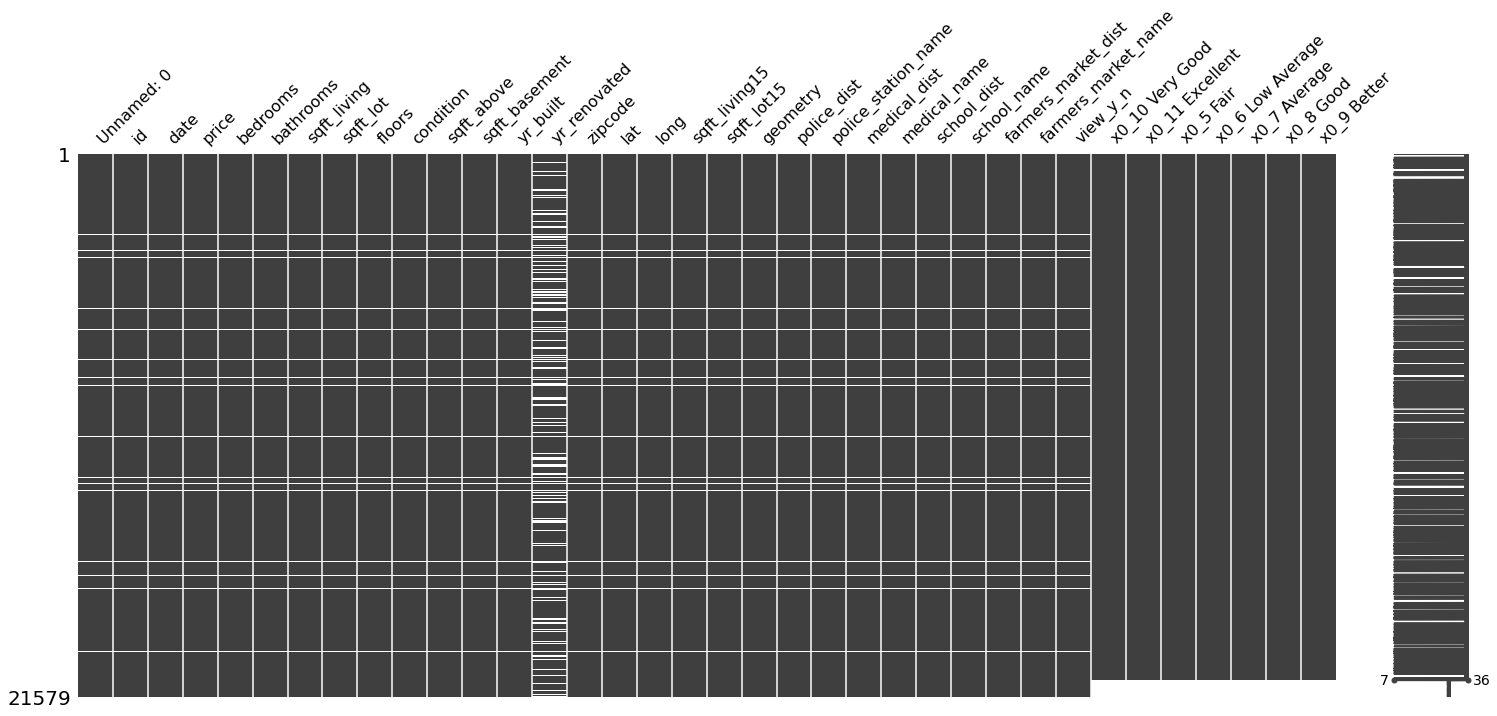

In [33]:
import missingno as msno

msno.matrix(df)


In [30]:
ohe2 = OneHotEncoder()
col_name2 = df[['condition']]
condition_ohe = ohe2.fit_transform(col_name2)



ValueError: Input contains NaN